<a href="https://colab.research.google.com/github/Godplex/alurageek-izix/blob/main/Proyecto_ajedrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación de librerias

In [ ]:
!pip install gdown

# Importacion de librerias


In [ ]:
import os
import sys
import pandas as pd
import gdown
from contextlib import redirect_stdout, redirect_stderr
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Cargar los Datos

In [ ]:
def cargar_csv_desde_drive(enlace_drive):
    file_id = enlace_drive.split('/')[-2]

    enlace_directo = f"https://drive.google.com/uc?export=download&id={file_id}"

    ruta_destino = '/content/archivo.csv'

    with open(os.devnull, 'w') as fnull, redirect_stdout(fnull), redirect_stderr(fnull):
        gdown.download(enlace_directo, ruta_destino, quiet=False)

    df = pd.read_csv(ruta_destino)

    return df

enlace_drive = 'https://drive.google.com/file/d/1XbZtI1I2HWyAC6kJ2PIU4YYQBTUR3mpX/view?usp=sharingg'
df = cargar_csv_desde_drive(enlace_drive)

df

,GameID,Event,Round,Site,Date,Time,White,WhiteElo,WhiteRatingDiff,White_is_deleted,...,Black_playTime_total,Black_count_all,Black_title,Moves,TotalMoves,ECO,Opening,TimeControl,Termination,Result
0,1,Rated Blitz game,-,https://lichess.org/FTXRGHsh,2024.01.01,00:00:08,EyalSa,1550,-6.0,False,...,1410838.0,2700.0,NaN,1. d4 { [%eval 0.13] [%clk 0:05:00] } 1... d5 ...,54,D06,Queen's Gambit Declined: Marshall Defense,300+3,Time forfeit,0-1
1,2,Rated Bullet game,-,https://lichess.org/WlpQqus4,2024.01.01,00:00:18,Frogman33,1082,9.0,False,...,2091417.0,4924.0,NaN,1. d4 { [%eval 0.13] [%clk 0:02:00] } 1... d5 ...,63,D00,Queen's Pawn Game,120+1,Time forfeit,1-0
2,3,Rated Blitz game,-,https://lichess.org/HzbO1wkJ,2024.01.01,00:00:34,Tomi_Viper,1593,-5.0,False,...,1424148.0,4085.0,NaN,1. e4 { [%eval 0.2] [%clk 0:05:00] } 1... c6 {...,52,B10,Caro-Kann Defense,300+3,Time forfeit,0-1
3,4,Rated Rapid game,-,https://lichess.org/hjgvXMvo,2024.01.01,00:01:26,pony14,2289,-5.0,False,...,1195075.0,1772.0,NaN,1. Nf3 { [%eval 0.2] [%clk 0:10:00] } 1... Nf6...,128,D78,"Neo-Grünfeld Defense: Classical Variation, Ori...",600+0,Normal,0-1
4,5,Rated Rapid game,-,https://lichess.org/VtuIOQzk,2024.01.01,00:02:20,Niccosan,1205,6.0,False,...,332692.0,576.0,NaN,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... d5?!...,65,B01,Scandinavian Defense: Mieses-Kotroc Variation,600+0,Normal,1-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130917,130918,Rated Blitz tournament https://lichess.org/tou...,-,https://lichess.org/gzfKh8TN,2024.01.31,23:53:59,LeonSav,1796,0.0,False,...,590026.0,1368.0,NaN,1. e4 { [%eval 0.2] [%clk 0:05:00] } 1... e5 {...,116,C57,"Italian Game: Two Knights Defense, Ulvestad Va...",300+0,Normal,0-1
130918,130919,Rated Blitz game,-,https://lichess.org/kwRAOauH,2024.01.31,23:55:08,SimbaC1,1962,-5.0,False,...,30391.0,196.0,NaN,1. e4 { [%eval 0.2] [%clk 0:03:00] } 1... c6 {...,84,B13,Caro-Kann Defense: Exchange Variation,180+0,Normal,0-1
130919,130920,Rated Rapid game,-,https://lichess.org/RuBrhCyl,2024.01.31,23:56:06,sawbstanley,1400,6.0,False,...,3686910.0,5473.0,NaN,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... c6 {...,75,B10,Caro-Kann Defense,600+0,Normal,1-0
130920,130921,Rated Rapid game,-,https://lichess.org/5at7GQ8j,2024.01.31,23:56:57,tkslvcoachken,1680,6.0,False,...,NaN,NaN,NaN,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... e5 {...,107,C50,Italian Game: Paris Defense,600+0,Normal,1-0


# Inspección de Datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130922 entries, 0 to 130921
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   GameID                130922 non-null  int64  
 1   Event                 130922 non-null  object 
 2   Round                 130922 non-null  object 
 3   Site                  130922 non-null  object 
 4   Date                  130922 non-null  object 
 5   Time                  130922 non-null  object 
 6   White                 130922 non-null  object 
 7   WhiteElo              130922 non-null  int64  
 8   WhiteRatingDiff       129927 non-null  float64
 9   White_is_deleted      130922 non-null  bool   
 10  White_tosViolation    2643 non-null    object 
 11  White_profile_flag    38711 non-null   object 
 12  White_createdAt       128330 non-null  float64
 13  White_playTime_total  128224 non-null  float64
 14  White_count_all       128330 non-null  float64
 15  

# Hallar filas duplicados

In [ ]:
df.duplicated().sum()

0

#  Tratar con Valores Faltantes


In [ ]:
df.isnull().sum()

GameID                       0
Event                        0
Round                        0
Site                         0
Date                         0
Time                         0
White                        0
WhiteElo                     0
WhiteRatingDiff            995
White_is_deleted             0
White_tosViolation      128279
White_profile_flag       92211
White_createdAt           2592
White_playTime_total      2698
White_count_all           2592
White_title             128378
Black                        0
BlackElo                     0
BlackRatingDiff            995
Black_is_deleted             0
Black_tosViolation      128266
Black_profile_flag       92257
Black_createdAt           2527
Black_playTime_total      2612
Black_count_all           2527
Black_title             128324
Moves                        0
TotalMoves                   0
ECO                          0
Opening                      0
TimeControl                  0
Termination                  0
Result  

## Eliminar columnas con valores faltantes

In [ ]:
cols_to_delete = ['White_tosViolation', 'White_title', 'White_profile_flag', 'White_createdAt', 'White_is_deleted', 'Black_tosViolation', 'Black_title', 'Black_profile_flag', 'Black_createdAt', 'Black_is_deleted']
df = df.drop(columns=cols_to_delete)

## Eliminar filas con valores nulos en las columnas

In [ ]:
columns_to_impute = [
    "WhiteRatingDiff", "White_playTime_total", "White_count_all",
    "BlackRatingDiff", "Black_playTime_total", "Black_count_all"
]

for column in columns_to_impute:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mean(), inplace=True)

df

,GameID,Event,Round,Site,Date,Time,White,WhiteElo,WhiteRatingDiff,White_playTime_total,...,BlackRatingDiff,Black_playTime_total,Black_count_all,Moves,TotalMoves,ECO,Opening,TimeControl,Termination,Result
0,1,Rated Blitz game,-,https://lichess.org/FTXRGHsh,2024.01.01,00:00:08,EyalSa,1550,-6.0,5743321.0,...,7.0,1.410838e+06,2700.000000,1. d4 { [%eval 0.13] [%clk 0:05:00] } 1... d5 ...,54,D06,Queen's Gambit Declined: Marshall Defense,300+3,Time forfeit,0-1
1,2,Rated Bullet game,-,https://lichess.org/WlpQqus4,2024.01.01,00:00:18,Frogman33,1082,9.0,1395490.0,...,-7.0,2.091417e+06,4924.000000,1. d4 { [%eval 0.13] [%clk 0:02:00] } 1... d5 ...,63,D00,Queen's Pawn Game,120+1,Time forfeit,1-0
2,3,Rated Blitz game,-,https://lichess.org/HzbO1wkJ,2024.01.01,00:00:34,Tomi_Viper,1593,-5.0,384800.0,...,5.0,1.424148e+06,4085.000000,1. e4 { [%eval 0.2] [%clk 0:05:00] } 1... c6 {...,52,B10,Caro-Kann Defense,300+3,Time forfeit,0-1
3,4,Rated Rapid game,-,https://lichess.org/hjgvXMvo,2024.01.01,00:01:26,pony14,2289,-5.0,1154156.0,...,5.0,1.195075e+06,1772.000000,1. Nf3 { [%eval 0.2] [%clk 0:10:00] } 1... Nf6...,128,D78,"Neo-Grünfeld Defense: Classical Variation, Ori...",600+0,Normal,0-1
4,5,Rated Rapid game,-,https://lichess.org/VtuIOQzk,2024.01.01,00:02:20,Niccosan,1205,6.0,886600.0,...,-6.0,3.326920e+05,576.000000,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... d5?!...,65,B01,Scandinavian Defense: Mieses-Kotroc Variation,600+0,Normal,1-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130917,130918,Rated Blitz tournament https://lichess.org/tou...,-,https://lichess.org/gzfKh8TN,2024.01.31,23:53:59,LeonSav,1796,0.0,3581203.0,...,1.0,5.900260e+05,1368.000000,1. e4 { [%eval 0.2] [%clk 0:05:00] } 1... e5 {...,116,C57,"Italian Game: Two Knights Defense, Ulvestad Va...",300+0,Normal,0-1
130918,130919,Rated Blitz game,-,https://lichess.org/kwRAOauH,2024.01.31,23:55:08,SimbaC1,1962,-5.0,3184358.0,...,192.0,3.039100e+04,196.000000,1. e4 { [%eval 0.2] [%clk 0:03:00] } 1... c6 {...,84,B13,Caro-Kann Defense: Exchange Variation,180+0,Normal,0-1
130919,130920,Rated Rapid game,-,https://lichess.org/RuBrhCyl,2024.01.31,23:56:06,sawbstanley,1400,6.0,573349.0,...,-6.0,3.686910e+06,5473.000000,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... c6 {...,75,B10,Caro-Kann Defense,600+0,Normal,1-0
130920,130921,Rated Rapid game,-,https://lichess.org/5at7GQ8j,2024.01.31,23:56:57,tkslvcoachken,1680,6.0,988474.0,...,-5.0,2.681482e+06,8906.431271,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... e5 {...,107,C50,Italian Game: Paris Defense,600+0,Normal,1-0


## Eliminar columnas innecesarias

In [ ]:
cols_unnecessary = ['GameID', 'Round', 'Site', 'Date', 'Time', 'Moves', 'Opening', 'ECO', 'Termination', 'White', 'Black', 'Event']
df = df.drop(columns=cols_unnecessary)
df

,WhiteElo,WhiteRatingDiff,White_playTime_total,White_count_all,BlackElo,BlackRatingDiff,Black_playTime_total,Black_count_all,TotalMoves,TimeControl,Result
0,1550,-6.0,5743321.0,8428.0,1492,7.0,1.410838e+06,2700.000000,54,300+3,0-1
1,1082,9.0,1395490.0,3160.0,1155,-7.0,2.091417e+06,4924.000000,63,120+1,1-0
2,1593,-5.0,384800.0,792.0,1641,5.0,1.424148e+06,4085.000000,52,300+3,0-1
3,2289,-5.0,1154156.0,2352.0,2307,5.0,1.195075e+06,1772.000000,128,600+0,0-1
4,1205,6.0,886600.0,1684.0,1214,-6.0,3.326920e+05,576.000000,65,600+0,1-0
...,...,...,...,...,...,...,...,...,...,...,...
130917,1796,0.0,3581203.0,12682.0,2299,1.0,5.900260e+05,1368.000000,116,300+0,0-1
130918,1962,-5.0,3184358.0,10738.0,1879,192.0,3.039100e+04,196.000000,84,180+0,0-1
130919,1400,6.0,573349.0,1302.0,1415,-6.0,3.686910e+06,5473.000000,75,600+0,1-0
130920,1680,6.0,988474.0,1842.0,1653,-5.0,2.681482e+06,8906.431271,107,600+0,1-0


# Transformación de Tipos de Datos: TimeControl sin Incremento

In [ ]:
df['TimeControl'] = df['TimeControl'].str.extract(r'^(\d+)')
df

,WhiteElo,WhiteRatingDiff,White_playTime_total,White_count_all,BlackElo,BlackRatingDiff,Black_playTime_total,Black_count_all,TotalMoves,TimeControl,Result
0,1550,-6.0,5743321.0,8428.0,1492,7.0,1.410838e+06,2700.000000,54,300,0-1
1,1082,9.0,1395490.0,3160.0,1155,-7.0,2.091417e+06,4924.000000,63,120,1-0
2,1593,-5.0,384800.0,792.0,1641,5.0,1.424148e+06,4085.000000,52,300,0-1
3,2289,-5.0,1154156.0,2352.0,2307,5.0,1.195075e+06,1772.000000,128,600,0-1
4,1205,6.0,886600.0,1684.0,1214,-6.0,3.326920e+05,576.000000,65,600,1-0
...,...,...,...,...,...,...,...,...,...,...,...
130917,1796,0.0,3581203.0,12682.0,2299,1.0,5.900260e+05,1368.000000,116,300,0-1
130918,1962,-5.0,3184358.0,10738.0,1879,192.0,3.039100e+04,196.000000,84,180,0-1
130919,1400,6.0,573349.0,1302.0,1415,-6.0,3.686910e+06,5473.000000,75,600,1-0
130920,1680,6.0,988474.0,1842.0,1653,-5.0,2.681482e+06,8906.431271,107,600,1-0


In [ ]:
df['TimeControl'] = pd.to_numeric(df['TimeControl'])
df

,WhiteElo,WhiteRatingDiff,White_playTime_total,White_count_all,BlackElo,BlackRatingDiff,Black_playTime_total,Black_count_all,TotalMoves,TimeControl,Result
0,1550,-6.0,5743321.0,8428.0,1492,7.0,1.410838e+06,2700.000000,54,300.0,0-1
1,1082,9.0,1395490.0,3160.0,1155,-7.0,2.091417e+06,4924.000000,63,120.0,1-0
2,1593,-5.0,384800.0,792.0,1641,5.0,1.424148e+06,4085.000000,52,300.0,0-1
3,2289,-5.0,1154156.0,2352.0,2307,5.0,1.195075e+06,1772.000000,128,600.0,0-1
4,1205,6.0,886600.0,1684.0,1214,-6.0,3.326920e+05,576.000000,65,600.0,1-0
...,...,...,...,...,...,...,...,...,...,...,...
130917,1796,0.0,3581203.0,12682.0,2299,1.0,5.900260e+05,1368.000000,116,300.0,0-1
130918,1962,-5.0,3184358.0,10738.0,1879,192.0,3.039100e+04,196.000000,84,180.0,0-1
130919,1400,6.0,573349.0,1302.0,1415,-6.0,3.686910e+06,5473.000000,75,600.0,1-0
130920,1680,6.0,988474.0,1842.0,1653,-5.0,2.681482e+06,8906.431271,107,600.0,1-0


## Eliminar filas con Abandonos y discretizacion de los datos

In [ ]:
df = df[df['Result'] != '*']
df.loc[:, 'Result'] = df['Result'].map({'1-0': 1, '0-1': -1, '1/2-1/2': 0})
df

,WhiteElo,WhiteRatingDiff,White_playTime_total,White_count_all,BlackElo,BlackRatingDiff,Black_playTime_total,Black_count_all,TotalMoves,TimeControl,Result
0,1550,-6.0,5743321.0,8428.0,1492,7.0,1.410838e+06,2700.000000,54,300.0,-1
1,1082,9.0,1395490.0,3160.0,1155,-7.0,2.091417e+06,4924.000000,63,120.0,1
2,1593,-5.0,384800.0,792.0,1641,5.0,1.424148e+06,4085.000000,52,300.0,-1
3,2289,-5.0,1154156.0,2352.0,2307,5.0,1.195075e+06,1772.000000,128,600.0,-1
4,1205,6.0,886600.0,1684.0,1214,-6.0,3.326920e+05,576.000000,65,600.0,1
...,...,...,...,...,...,...,...,...,...,...,...
130917,1796,0.0,3581203.0,12682.0,2299,1.0,5.900260e+05,1368.000000,116,300.0,-1
130918,1962,-5.0,3184358.0,10738.0,1879,192.0,3.039100e+04,196.000000,84,180.0,-1
130919,1400,6.0,573349.0,1302.0,1415,-6.0,3.686910e+06,5473.000000,75,600.0,1
130920,1680,6.0,988474.0,1842.0,1653,-5.0,2.681482e+06,8906.431271,107,600.0,1


In [ ]:
df['Result'] = pd.to_numeric(df['Result'])
df

<ipython-input-16-98d955de8c74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Result'] = pd.to_numeric(df['Result'])


,WhiteElo,WhiteRatingDiff,White_playTime_total,White_count_all,BlackElo,BlackRatingDiff,Black_playTime_total,Black_count_all,TotalMoves,TimeControl,Result
0,1550,-6.0,5743321.0,8428.0,1492,7.0,1.410838e+06,2700.000000,54,300.0,-1
1,1082,9.0,1395490.0,3160.0,1155,-7.0,2.091417e+06,4924.000000,63,120.0,1
2,1593,-5.0,384800.0,792.0,1641,5.0,1.424148e+06,4085.000000,52,300.0,-1
3,2289,-5.0,1154156.0,2352.0,2307,5.0,1.195075e+06,1772.000000,128,600.0,-1
4,1205,6.0,886600.0,1684.0,1214,-6.0,3.326920e+05,576.000000,65,600.0,1
...,...,...,...,...,...,...,...,...,...,...,...
130917,1796,0.0,3581203.0,12682.0,2299,1.0,5.900260e+05,1368.000000,116,300.0,-1
130918,1962,-5.0,3184358.0,10738.0,1879,192.0,3.039100e+04,196.000000,84,180.0,-1
130919,1400,6.0,573349.0,1302.0,1415,-6.0,3.686910e+06,5473.000000,75,600.0,1
130920,1680,6.0,988474.0,1842.0,1653,-5.0,2.681482e+06,8906.431271,107,600.0,1


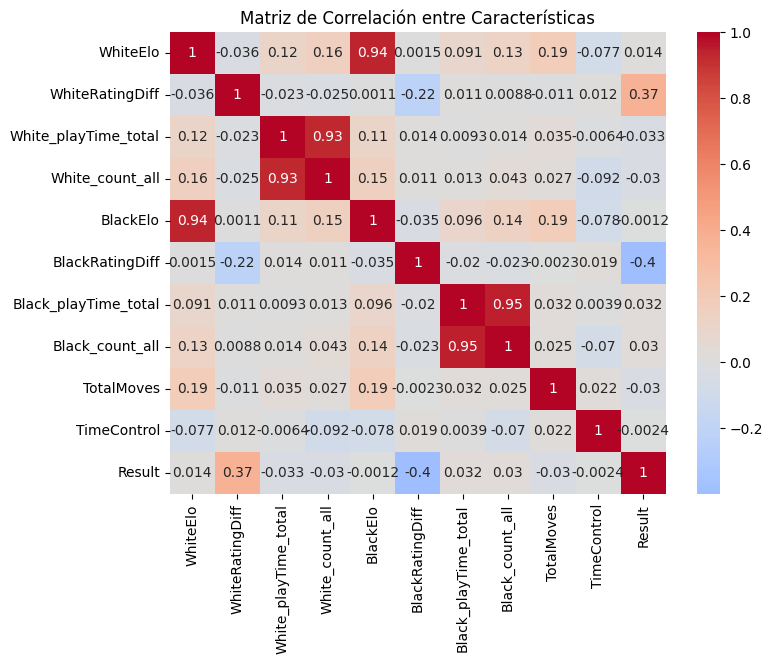

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Características')
plt.show()

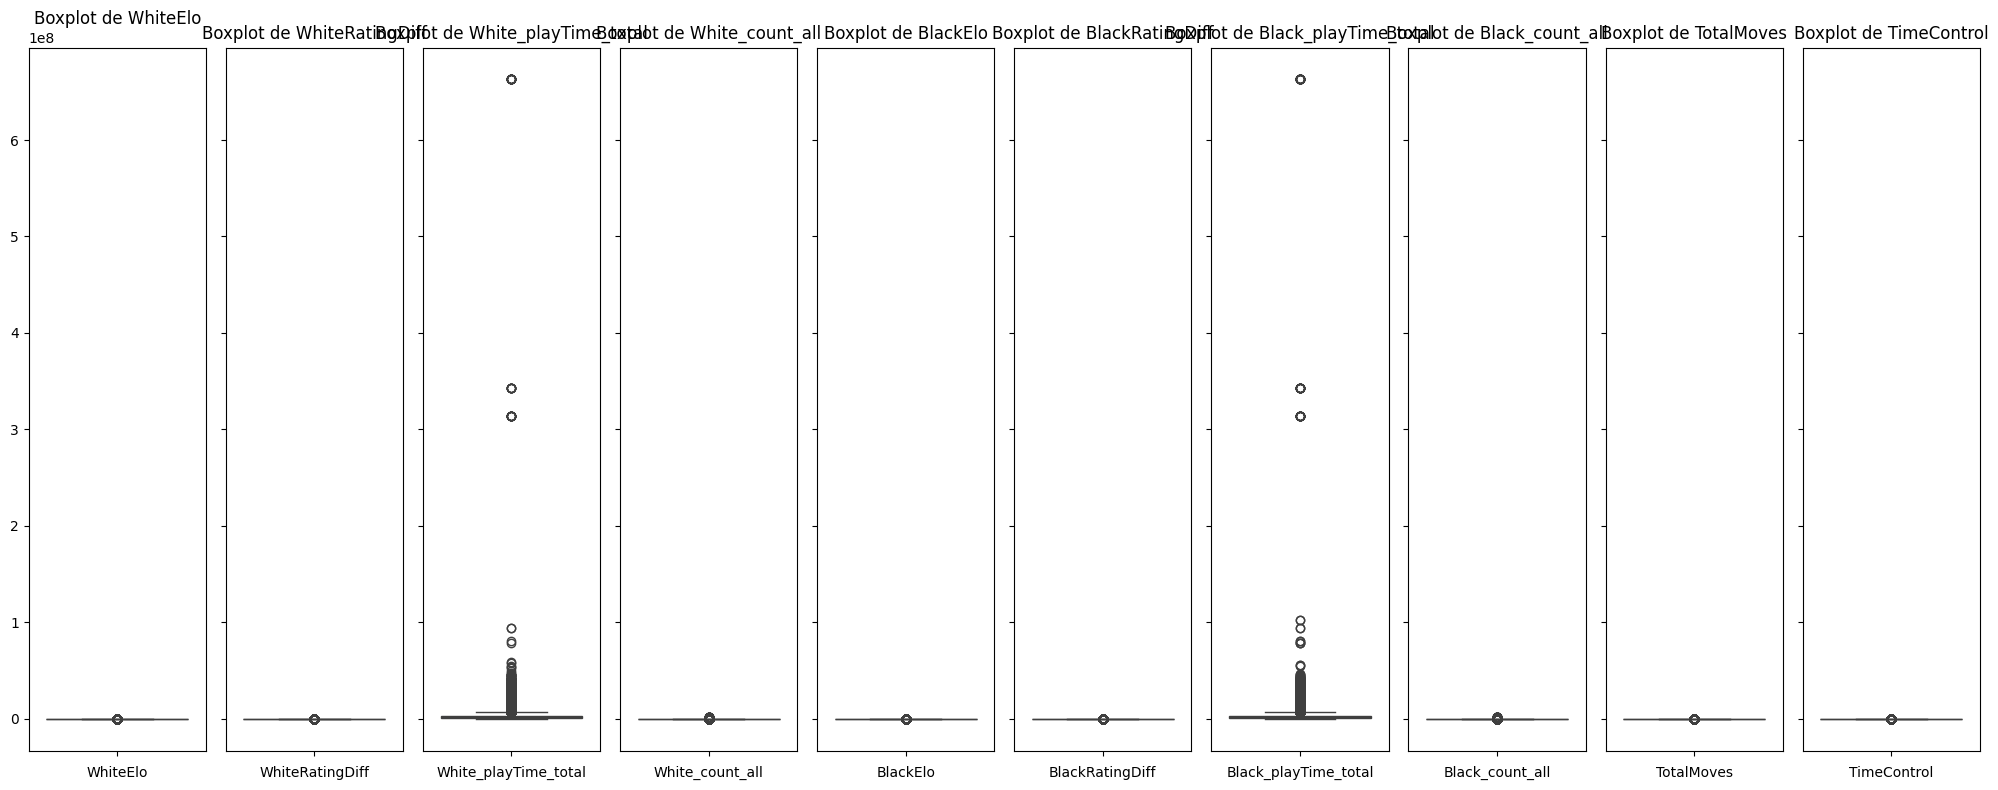

In [ ]:
features = ['WhiteElo',	'WhiteRatingDiff',	'White_playTime_total',	'White_count_all',	'BlackElo',	'BlackRatingDiff',	'Black_playTime_total',	'Black_count_all',	'TotalMoves',	'TimeControl']

# Crear una figura
fig, axes = plt.subplots(1, len(features), figsize=(20, 8), sharey=True)

# Crear un boxplot vertical para cada característica
for i, feature in enumerate(features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot de {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('')

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Eliminar valores atípicos
columns = ['WhiteElo',	'WhiteRatingDiff',	'White_playTime_total',	'White_count_all',	'BlackElo',	'BlackRatingDiff',	'Black_playTime_total',	'Black_count_all',	'TotalMoves',	'TimeControl']
df2 = remove_outliers(df, columns)
df2

,WhiteElo,WhiteRatingDiff,White_playTime_total,White_count_all,BlackElo,BlackRatingDiff,Black_playTime_total,Black_count_all,TotalMoves,TimeControl,Result
0,1550,-6.0,5743321.0,8428.0,1492,7.0,1.410838e+06,2700.000000,54,300.0,-1
1,1082,9.0,1395490.0,3160.0,1155,-7.0,2.091417e+06,4924.000000,63,120.0,1
2,1593,-5.0,384800.0,792.0,1641,5.0,1.424148e+06,4085.000000,52,300.0,-1
3,2289,-5.0,1154156.0,2352.0,2307,5.0,1.195075e+06,1772.000000,128,600.0,-1
4,1205,6.0,886600.0,1684.0,1214,-6.0,3.326920e+05,576.000000,65,600.0,1
...,...,...,...,...,...,...,...,...,...,...,...
130913,1333,7.0,34182.0,202.0,1326,-6.0,1.487262e+06,4360.000000,77,180.0,1
130914,1878,-5.0,3336114.0,10520.0,1895,5.0,1.136539e+06,2932.000000,86,180.0,-1
130917,1796,0.0,3581203.0,12682.0,2299,1.0,5.900260e+05,1368.000000,116,300.0,-1
130919,1400,6.0,573349.0,1302.0,1415,-6.0,3.686910e+06,5473.000000,75,600.0,1


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Run

#Análisis Exploratorio de Datos

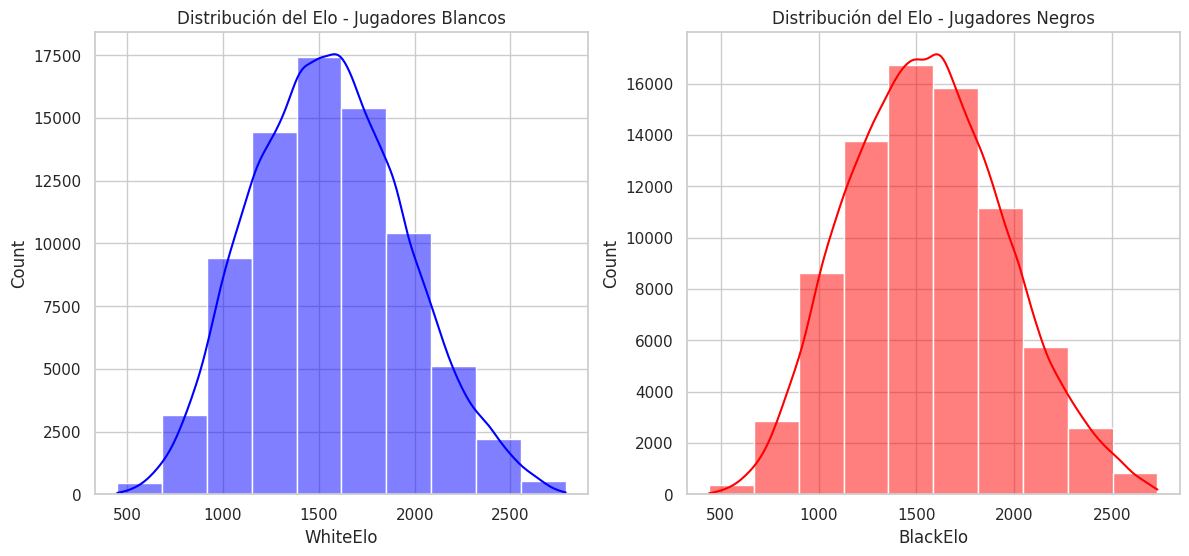

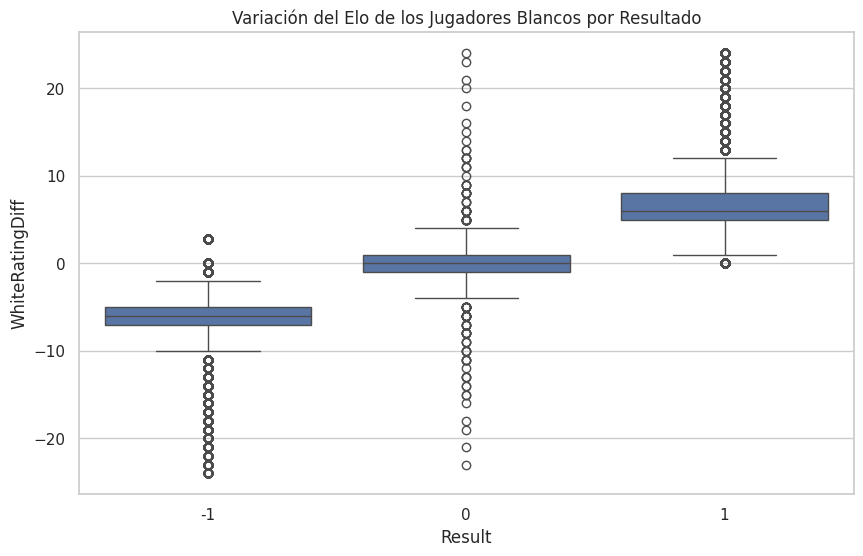

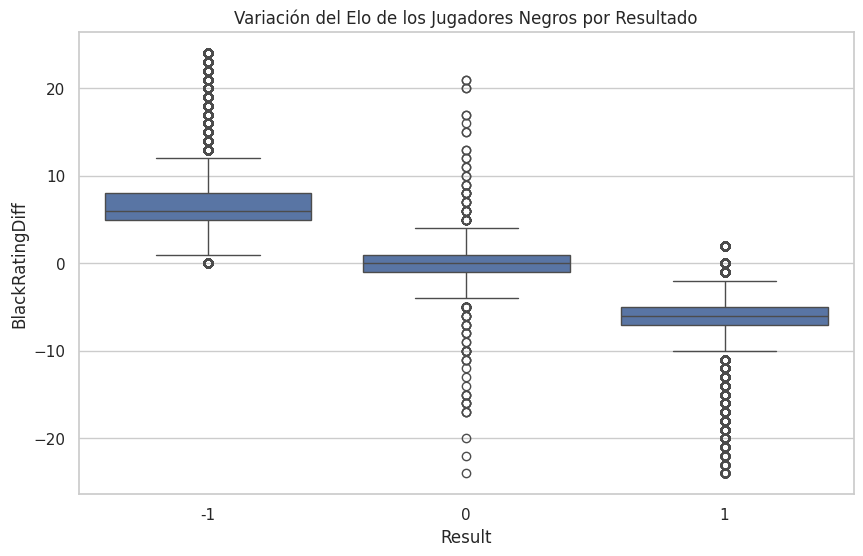

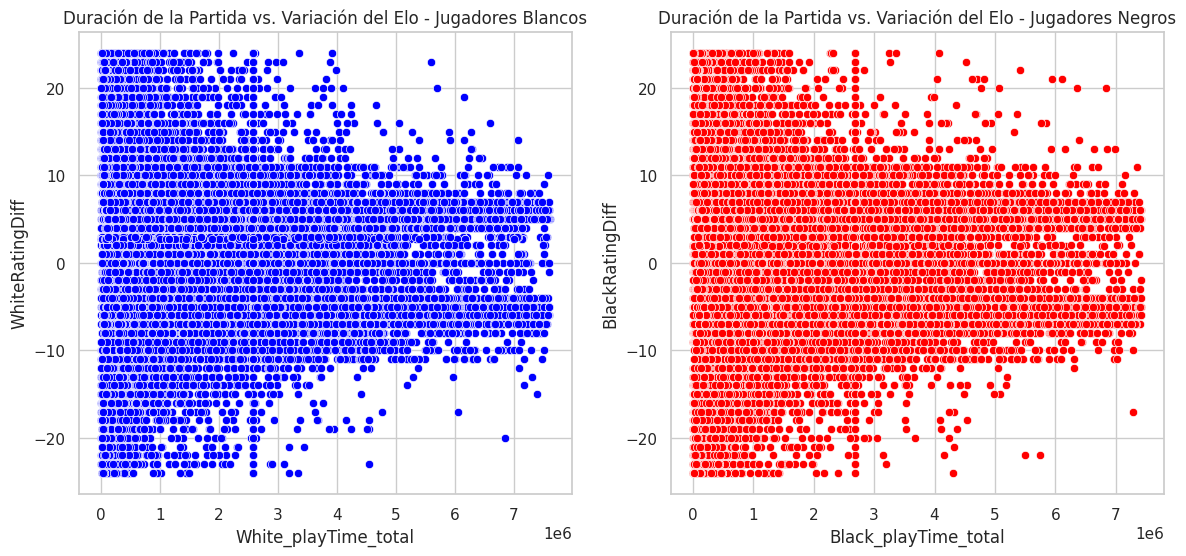

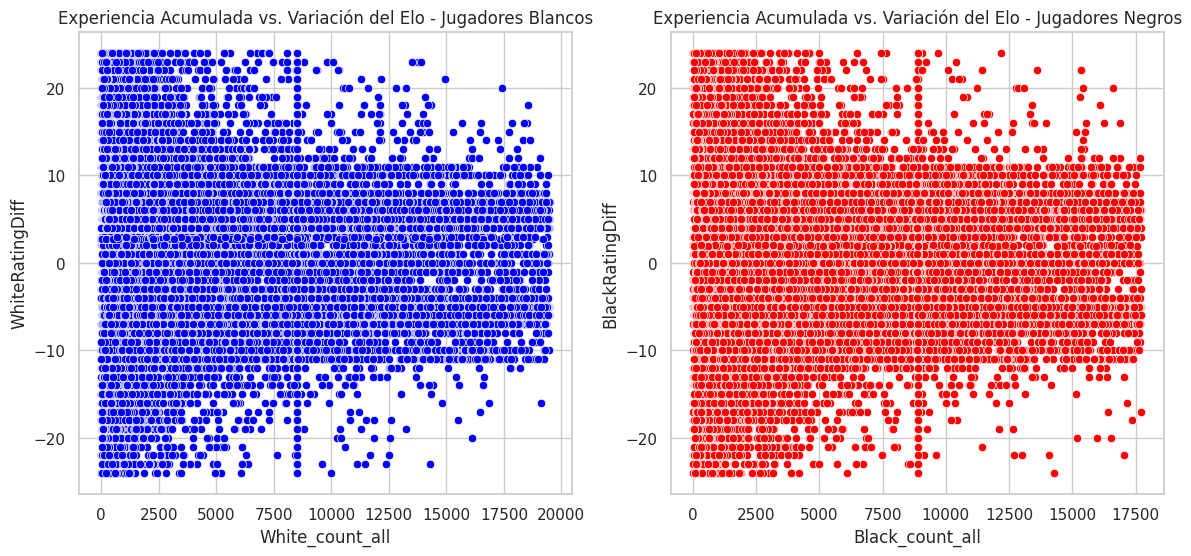

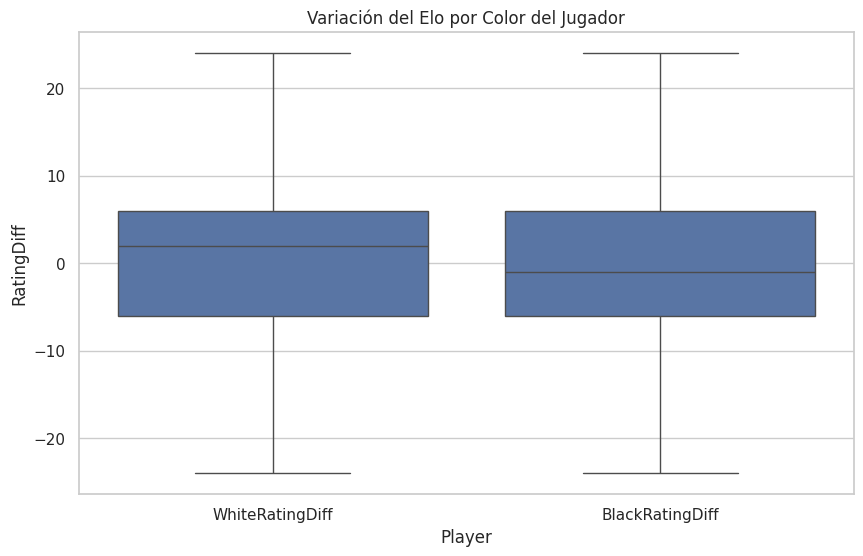

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# 1. Histograma de los ratings Elo
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2['WhiteElo'], kde=True, color='blue', bins=10)
plt.title('Distribución del Elo - Jugadores Blancos')

plt.subplot(1, 2, 2)
sns.histplot(df2['BlackElo'], kde=True, color='red', bins=10)
plt.title('Distribución del Elo - Jugadores Negros')

plt.show()

# 2. Boxplot de la variación del Elo por resultado de la partida
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='WhiteRatingDiff', data=df2)
plt.title('Variación del Elo de los Jugadores Blancos por Resultado')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='BlackRatingDiff', data=df2)
plt.title('Variación del Elo de los Jugadores Negros por Resultado')
plt.show()

# 3. Scatter plot de la duración de la partida vs. variación del Elo
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='White_playTime_total', y='WhiteRatingDiff', data=df2, color='blue')
plt.title('Duración de la Partida vs. Variación del Elo - Jugadores Blancos')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Black_playTime_total', y='BlackRatingDiff', data=df2, color='red')
plt.title('Duración de la Partida vs. Variación del Elo - Jugadores Negros')

plt.show()

# 4. Scatter plot de la experiencia acumulada vs. variación del Elo
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='White_count_all', y='WhiteRatingDiff', data=df2, color='blue')
plt.title('Experiencia Acumulada vs. Variación del Elo - Jugadores Blancos')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Black_count_all', y='BlackRatingDiff', data=df2, color='red')
plt.title('Experiencia Acumulada vs. Variación del Elo - Jugadores Negros')

plt.show()

# 5. Boxplot de la variación del Elo por color del jugador
df_melted = pd.melt(df2, id_vars=['Result'], value_vars=['WhiteRatingDiff', 'BlackRatingDiff'],
                    var_name='Player', value_name='RatingDiff')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Player', y='RatingDiff', data=df_melted)
plt.title('Variación del Elo por Color del Jugador')
plt.show()

In [ ]:
print(df2.isna().sum())


WhiteElo                0
WhiteRatingDiff         0
White_playTime_total    0
White_count_all         0
BlackElo                0
BlackRatingDiff         0
Black_playTime_total    0
Black_count_all         0
TotalMoves              0
TimeControl             0
Result                  0
dtype: int64


In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = df2.drop(columns=['Result'])
y = df2['Result']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Definir la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Mejores hiperparámetros: {best_params}")
print(f"Precisión del modelo: {accuracy}")
print(f"Reporte de clasificación:\n{report}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Precisión del modelo: 0.9908922998535126
Reporte de clasificación:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      7335
           0       0.97      0.87      0.92       527
           1       0.99      1.00      0.99      7839

    accuracy                           0.99     15701
   macro avg       0.98      0.95      0.97     15701
weighted avg       0.99      0.99      0.99     15701



In [ ]:
# Guardar el modelo en un archivo
joblib_file = "modelo_ajedrez.pkl"
joblib.dump(best_model, joblib_file)
print(f"Modelo guardado en: {joblib_file}")

Modelo guardado en: modelo_ajedrez.pkl
